<a href="https://colab.research.google.com/github/kelvinnjunge/hypothesis-testing/blob/main/HYPOTHESIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis


##1. Defining the Question


### a) Specifying the Data Analytic question: PROBLEM STATEMENT
  
  
  Investigate a claim about the blue cars from the autilob dataset.

  Null hypothesis: there is no difference in the     average number of blue cars returned on saturday and that of the blue cars returned on sunday?

  Alternative hypothesis: there is a difference in the average number of blue cars returned on saturday to that of the blue cars returned on sunday(CLAIM:)

### b) Defining the Metric for Success
The objectives for this data includes investigating the claim listed above and knowing whether or not the the average number of blue cars returned on saturday is different from that of the blue cars returned on sunday

###c) Understanding the context
Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made.

### d) Recording the Experimental Design
Defining the research question

Finding and dealing with outliers, anomalies, and missing data within the dataset.

Plot appropriate univariate and bivariate summaries recording our observations.

Implement the solution by performing hypothesis testing.

Challenge your solution by providing insights on how you can make improvements. Defining the research question

### e) Relevance of the data
THe data that was used for survey was obtained from an open datasource. The provided dataset is a daily aggregation, by date and postal code, of the number of events on the Autolib network (car-sharing and recharging). the dataset used was ranging from january to july of 2018 and is relevant for this analysis

## Data Loading


In [ ]:
# Importing librabies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/autolib_daily_events_postal_code (1).csv',parse_dates=[1])

In [ ]:
# Preview the head of the dataset
df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
# Preview the tail of the dataset
df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,2018-06-15,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,2018-06-16,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,2018-06-17,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,2018-06-18,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,2018-06-19,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
# Preview the shape of the dataset
df.shape

(16085, 13)

In [ ]:
# preview the columns in the dataset
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
# preview the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Postal code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayOfWeek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   BlueCars_taken_sum      16085 non-null  int64         
 6   BlueCars_returned_sum   16085 non-null  int64         
 7   Utilib_taken_sum        16085 non-null  int64         
 8   Utilib_returned_sum     16085 non-null  int64         
 9   Utilib_14_taken_sum     16085 non-null  int64         
 10  Utilib_14_returned_sum  16085 non-null  int64         
 11  Slots_freed_sum         16085 non-null  int64         
 12  Slots_taken_sum         16085 non-null  int64 

In [ ]:
# Preview unique values in the data set
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

## Data cleaning

In [ ]:
# Drop unnecessary columns
columns =["utilibtakensum","utilibreturnedsum","utilib14takensum","utilib14returnedsum"]
df.drop(columns,axis=1,inplace=True)

In [ ]:
# writing columns name in lower case
df.columns = df.columns.str.replace(" ","_").str.replace("_","").str.lower()
df.head(1)

,postalcode,date,ndailydatapoints,dayofweek,daytype,bluecarstakensum,bluecarsreturnedsum,utilibtakensum,utilibreturnedsum,utilib14takensum,utilib14returnedsum,slotsfreedsum,slotstakensum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20


In [ ]:
# Rename the columns name
df.rename(columns=({"postalcode":"postal_code","date":"date", "ndailydatapoints":"daily_data_points","dayofweek":"day_of_week", "daytype":"day_type","bluecarstakensum"	:"blue_cars_taken_sum","bluecarsreturnedsum":"blue_cars_returned_sum","slotsfreedsum":"slots_freed_sum","slotstakensum":"slots_taken_sum"}),inplace=True)
df.head(1)

,postal_code,date,daily_data_points,day_of_week,day_type,blue_cars_taken_sum,blue_cars_returned_sum,utilibtakensum,utilibreturnedsum,utilib14takensum,utilib14returnedsum,slots_freed_sum,slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20


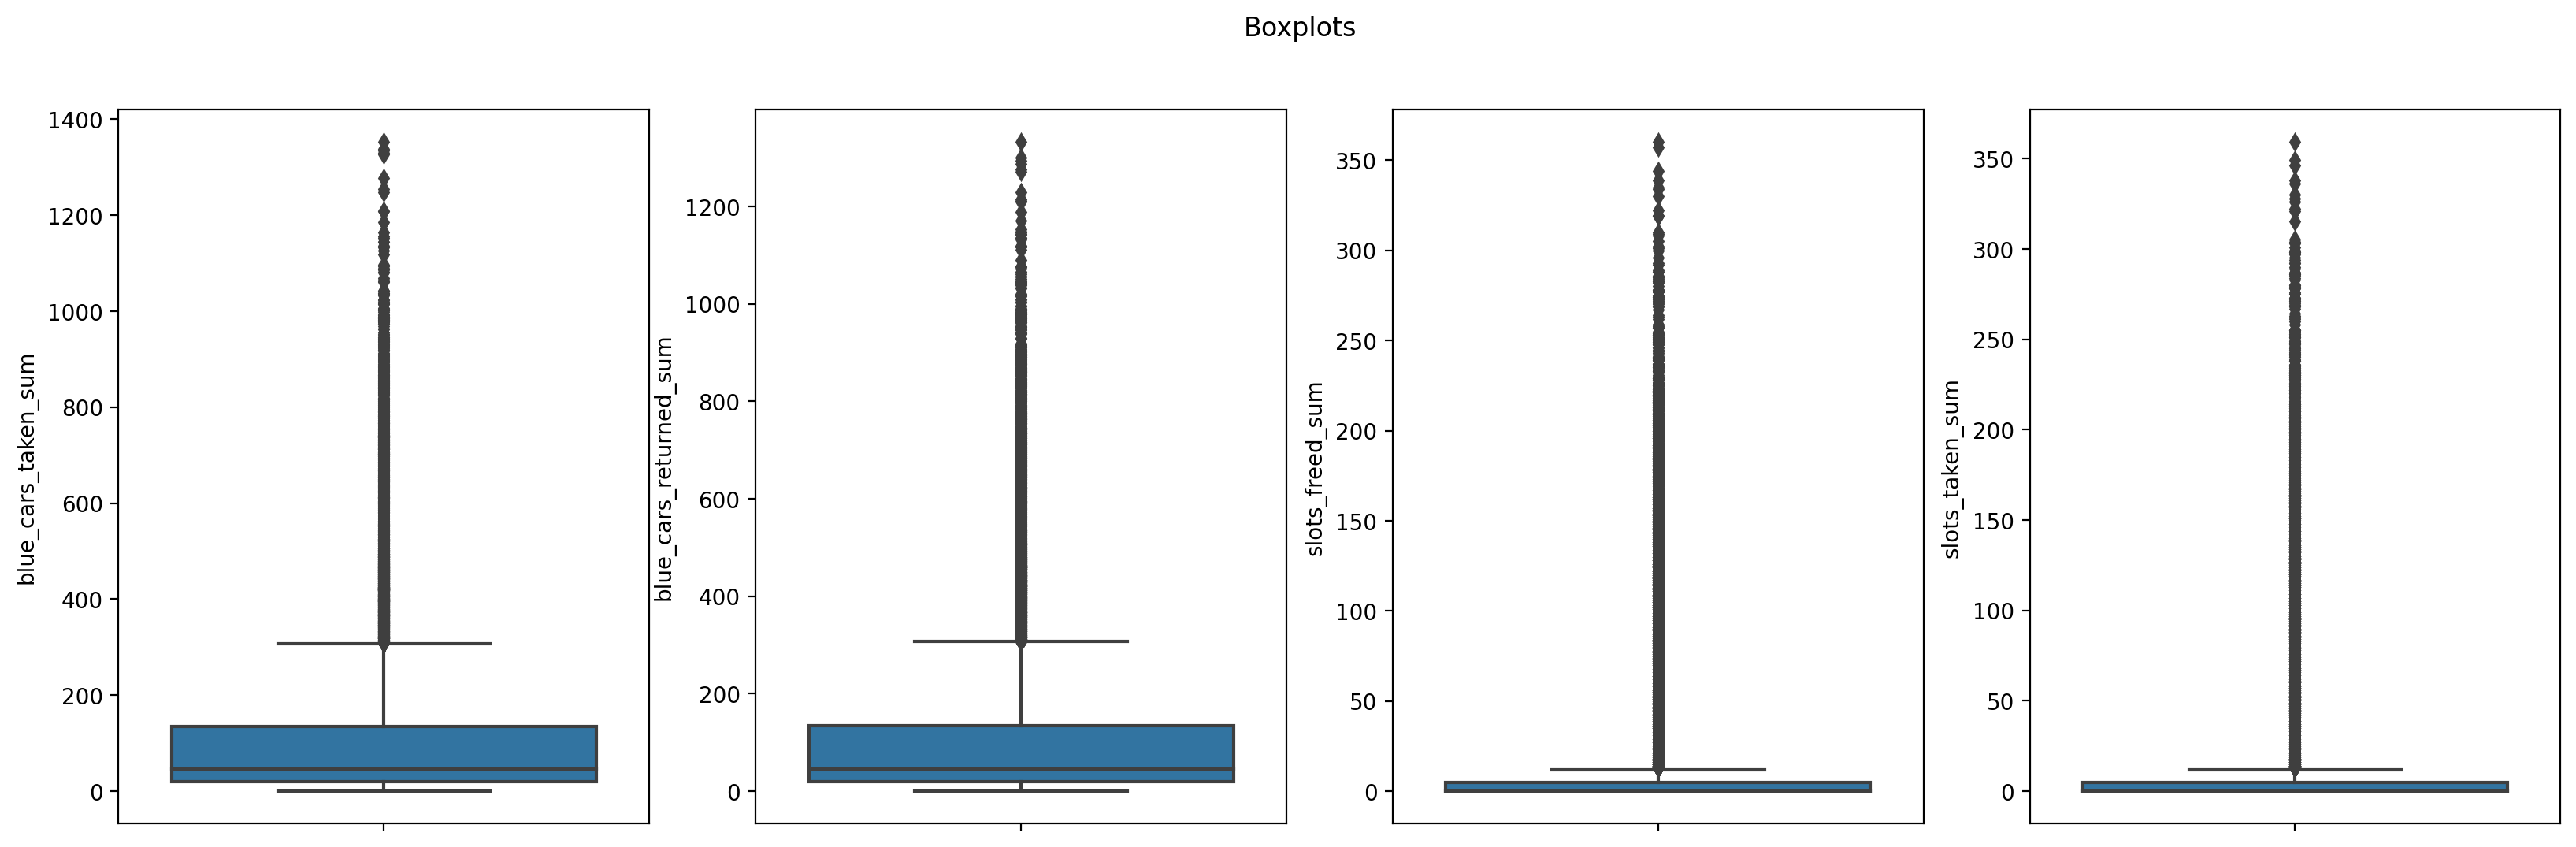

In [ ]:
#checking outliers
fig, ((ax1, ax2,ax3,ax4)) = plt.subplots(1,4 ,figsize=(20,6),dpi=200)
fig.suptitle('Boxplots')
sns.boxplot(y=df['blue_cars_taken_sum'], ax=ax1)
sns.boxplot(y=df['blue_cars_returned_sum'], ax=ax2)
sns.boxplot(y=df['slots_freed_sum'], ax=ax3)
sns.boxplot(y=df['slots_taken_sum'], ax=ax4)
plt.show()

In [ ]:
# Removing outliers
q1,q3 = np.percentile(df['blue_cars_returned_sum'],(25,75))
iqr = q3 - q1
min1 = q1 -(1.5*iqr)
max2 = q3 +(1.5*iqr)

df[(df['blue_cars_returned_sum']<min1) | (df['blue_cars_returned_sum']>max2)]
df.drop(df[(df['blue_cars_returned_sum']<min1)|(df['blue_cars_returned_sum']>max2)].index,inplace=True)

q1,q3 = np.percentile(df['blue_cars_taken_sum'],(25,75))
iqr = q3 - q1
min1 = q1 -(1.5*iqr)
max2 = q3 +(1.5*iqr)

df[(df['blue_cars_taken_sum']<min1) | (df['blue_cars_taken_sum']>max2)]
df.drop(df[(df['blue_cars_taken_sum']<min1)|(df['blue_cars_taken_sum']>max2)].index,inplace=True)

q1,q3 = np.percentile(df['slots_freed_sum'],(25,75))
iqr = q3 - q1
min1 = q1 -(1.5*iqr)
max2 = q3 +(1.5*iqr)

df[(df['slots_freed_sum']<min1) | (df['slots_freed_sum']>max2)]
df.drop(df[(df['slots_freed_sum']<min1)|(df['slots_freed_sum']>max2)].index,inplace=True)

q1,q3 = np.percentile(df['slots_taken_sum'],(25,75))
iqr = q3 - q1
min1 = q1 -(1.5*iqr)
max2 = q3 +(1.5*iqr)

df[(df['slots_taken_sum']<min1) | (df['slots_taken_sum']>max2)]
df.drop(df[(df['slots_taken_sum']<min1)|(df['slots_taken_sum']>max2)].index,inplace=True)

In [ ]:
# checking for null values in data set
df.isnull().sum()

postal_code               0
date                      0
daily_data_points         0
day_of_week               0
day_type                  0
blue_cars_taken_sum       0
blue_cars_returned_sum    0
utilibtakensum            0
utilibreturnedsum         0
utilib14takensum          0
utilib14returnedsum       0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [ ]:
# checking for duplicate values in the data set
df.duplicated().sum()

0

In [ ]:
# Dropping slots columns
df.drop(columns=["slots_freed_sum","slots_taken_sum"],inplace=True)

In [ ]:
# mapping the day of week column
df['day_of_week'] = df['day_of_week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})

## EXPLORATORY ANALYSIS

### Univariate analysis



#### categorical variables

In [ ]:
# frequency table for day type
df["day_type"].value_counts()

weekday    7190
weekend    2763
Name: day_type, dtype: int64

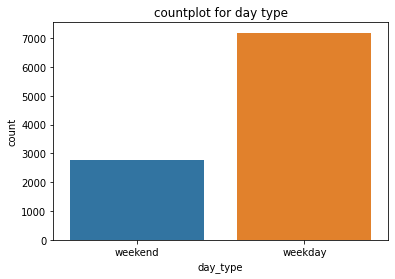

In [ ]:
# countplot for day type
sns.countplot(x =df["day_type"])
plt.title("countplot for day type")
plt.show()


In [ ]:
# frequenct
df["day_of_week"].value_counts()

Mon     1480
Tue     1462
Thur    1419
Fri     1416
Wed     1413
Sun     1384
Sat     1379
Name: day_of_week, dtype: int64

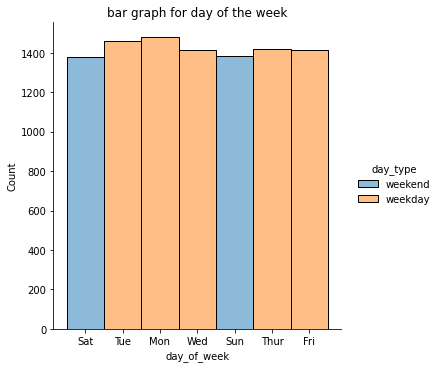

In [ ]:
# plotting bar graph for day of the week
sns.displot(x=df['day_of_week'],hue=df['day_type'])
plt.title('bar graph for day of the week')
plt.show()

#### numerical varibles

In [ ]:
# getting more information of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
postal_code,9953.0,92390.295790,3548.707148,75001.0,92260.0,93110.0,94110.0,95880.0
daily_data_points,9953.0,1431.151713,33.368041,1174.0,1439.0,1440.0,1440.0,1440.0
blue_cars_taken_sum,9953.0,41.902542,37.185746,0.0,15.0,30.0,56.0,177.0
blue_cars_returned_sum,9953.0,41.966744,37.126086,0.0,16.0,30.0,56.0,196.0


In [ ]:
# calculating mode of every numerical column in the data set
print('The mode of daily data points: ' + str(df.daily_data_points.mode()))
print('The mode of Bluecars taken: ' +str(df.blue_cars_taken_sum.mode()))
print('The mode of Bluecars returned: ' +str(df.blue_cars_returned_sum.mode()))

The mode of daily data points: 0    1440
dtype: int64
The mode of Bluecars taken: 0    12
dtype: int64
The mode of Bluecars returned: 0    12
dtype: int64


In [ ]:
# calculating median of every numerical column in the data set
print('The median of daily data points: ' + str(df.daily_data_points.median()))
print('The median of Bluecars taken: ' +str(df.blue_cars_taken_sum.median()))
print('The median of Bluecars returned: ' +str(df.blue_cars_returned_sum.median()))


The median of daily data points: 1440.0
The median of Bluecars taken: 30.0
The median of Bluecars returned: 30.0


In [ ]:
# calculating mean of every numerical column in the data set
print('The mean of daily data points: ' + str(df.daily_data_points.mean()))
print('The mean of Bluecars taken: ' +str(df.blue_cars_taken_sum.mean()))
print('The mean of Bluecars returned: ' +str(df.blue_cars_returned_sum.mean()))

The mean of daily data points: 1431.1517130513414
The mean of Bluecars taken: 41.90254194715161
The mean of Bluecars returned: 41.96674369536823


In [ ]:
# calculating standard deviation of every numerical column in the data set
print('The standard deviation of daily data points: ' + str(df.daily_data_points.std()))
print('The standard deviation of Bluecars taken: ' +str(df.blue_cars_taken_sum.std()))
print('The standard deviation of Bluecars returned: ' +str(df.blue_cars_returned_sum.std()))

The standard deviation of daily data points: 33.3680406494873
The standard deviation of Bluecars taken: 37.1857457781392
The standard deviation of Bluecars returned: 37.126085994491994


In [ ]:
# calculating kurtosis of every numerical column in the data set
print('The kurtosis of daily data points: ' + str(df.daily_data_points.kurt()))
print('The kurtosis of Bluecars taken: ' +str(df.blue_cars_taken_sum.kurt()))
print('The kurtosis of Bluecars returned: ' +str(df.blue_cars_returned_sum.kurt()))

The kurtosis of daily data points: 35.921083179858186
The kurtosis of Bluecars taken: 1.784094580597234
The kurtosis of Bluecars returned: 1.9405886822627316


In [ ]:
# calculating skewness of every numerical column in the data set
print('The skweness of daily data points: ' + str(df.daily_data_points.skew()))
print('The skweness of Bluecars taken: ' +str(df.blue_cars_taken_sum.skew()))
print('The slweness of Bluecars returned: ' +str(df.blue_cars_returned_sum.skew()))

The skweness of daily data points: -5.681669779839679
The skweness of Bluecars taken: 1.4652906388531066
The slweness of Bluecars returned: 1.5013806147262234


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

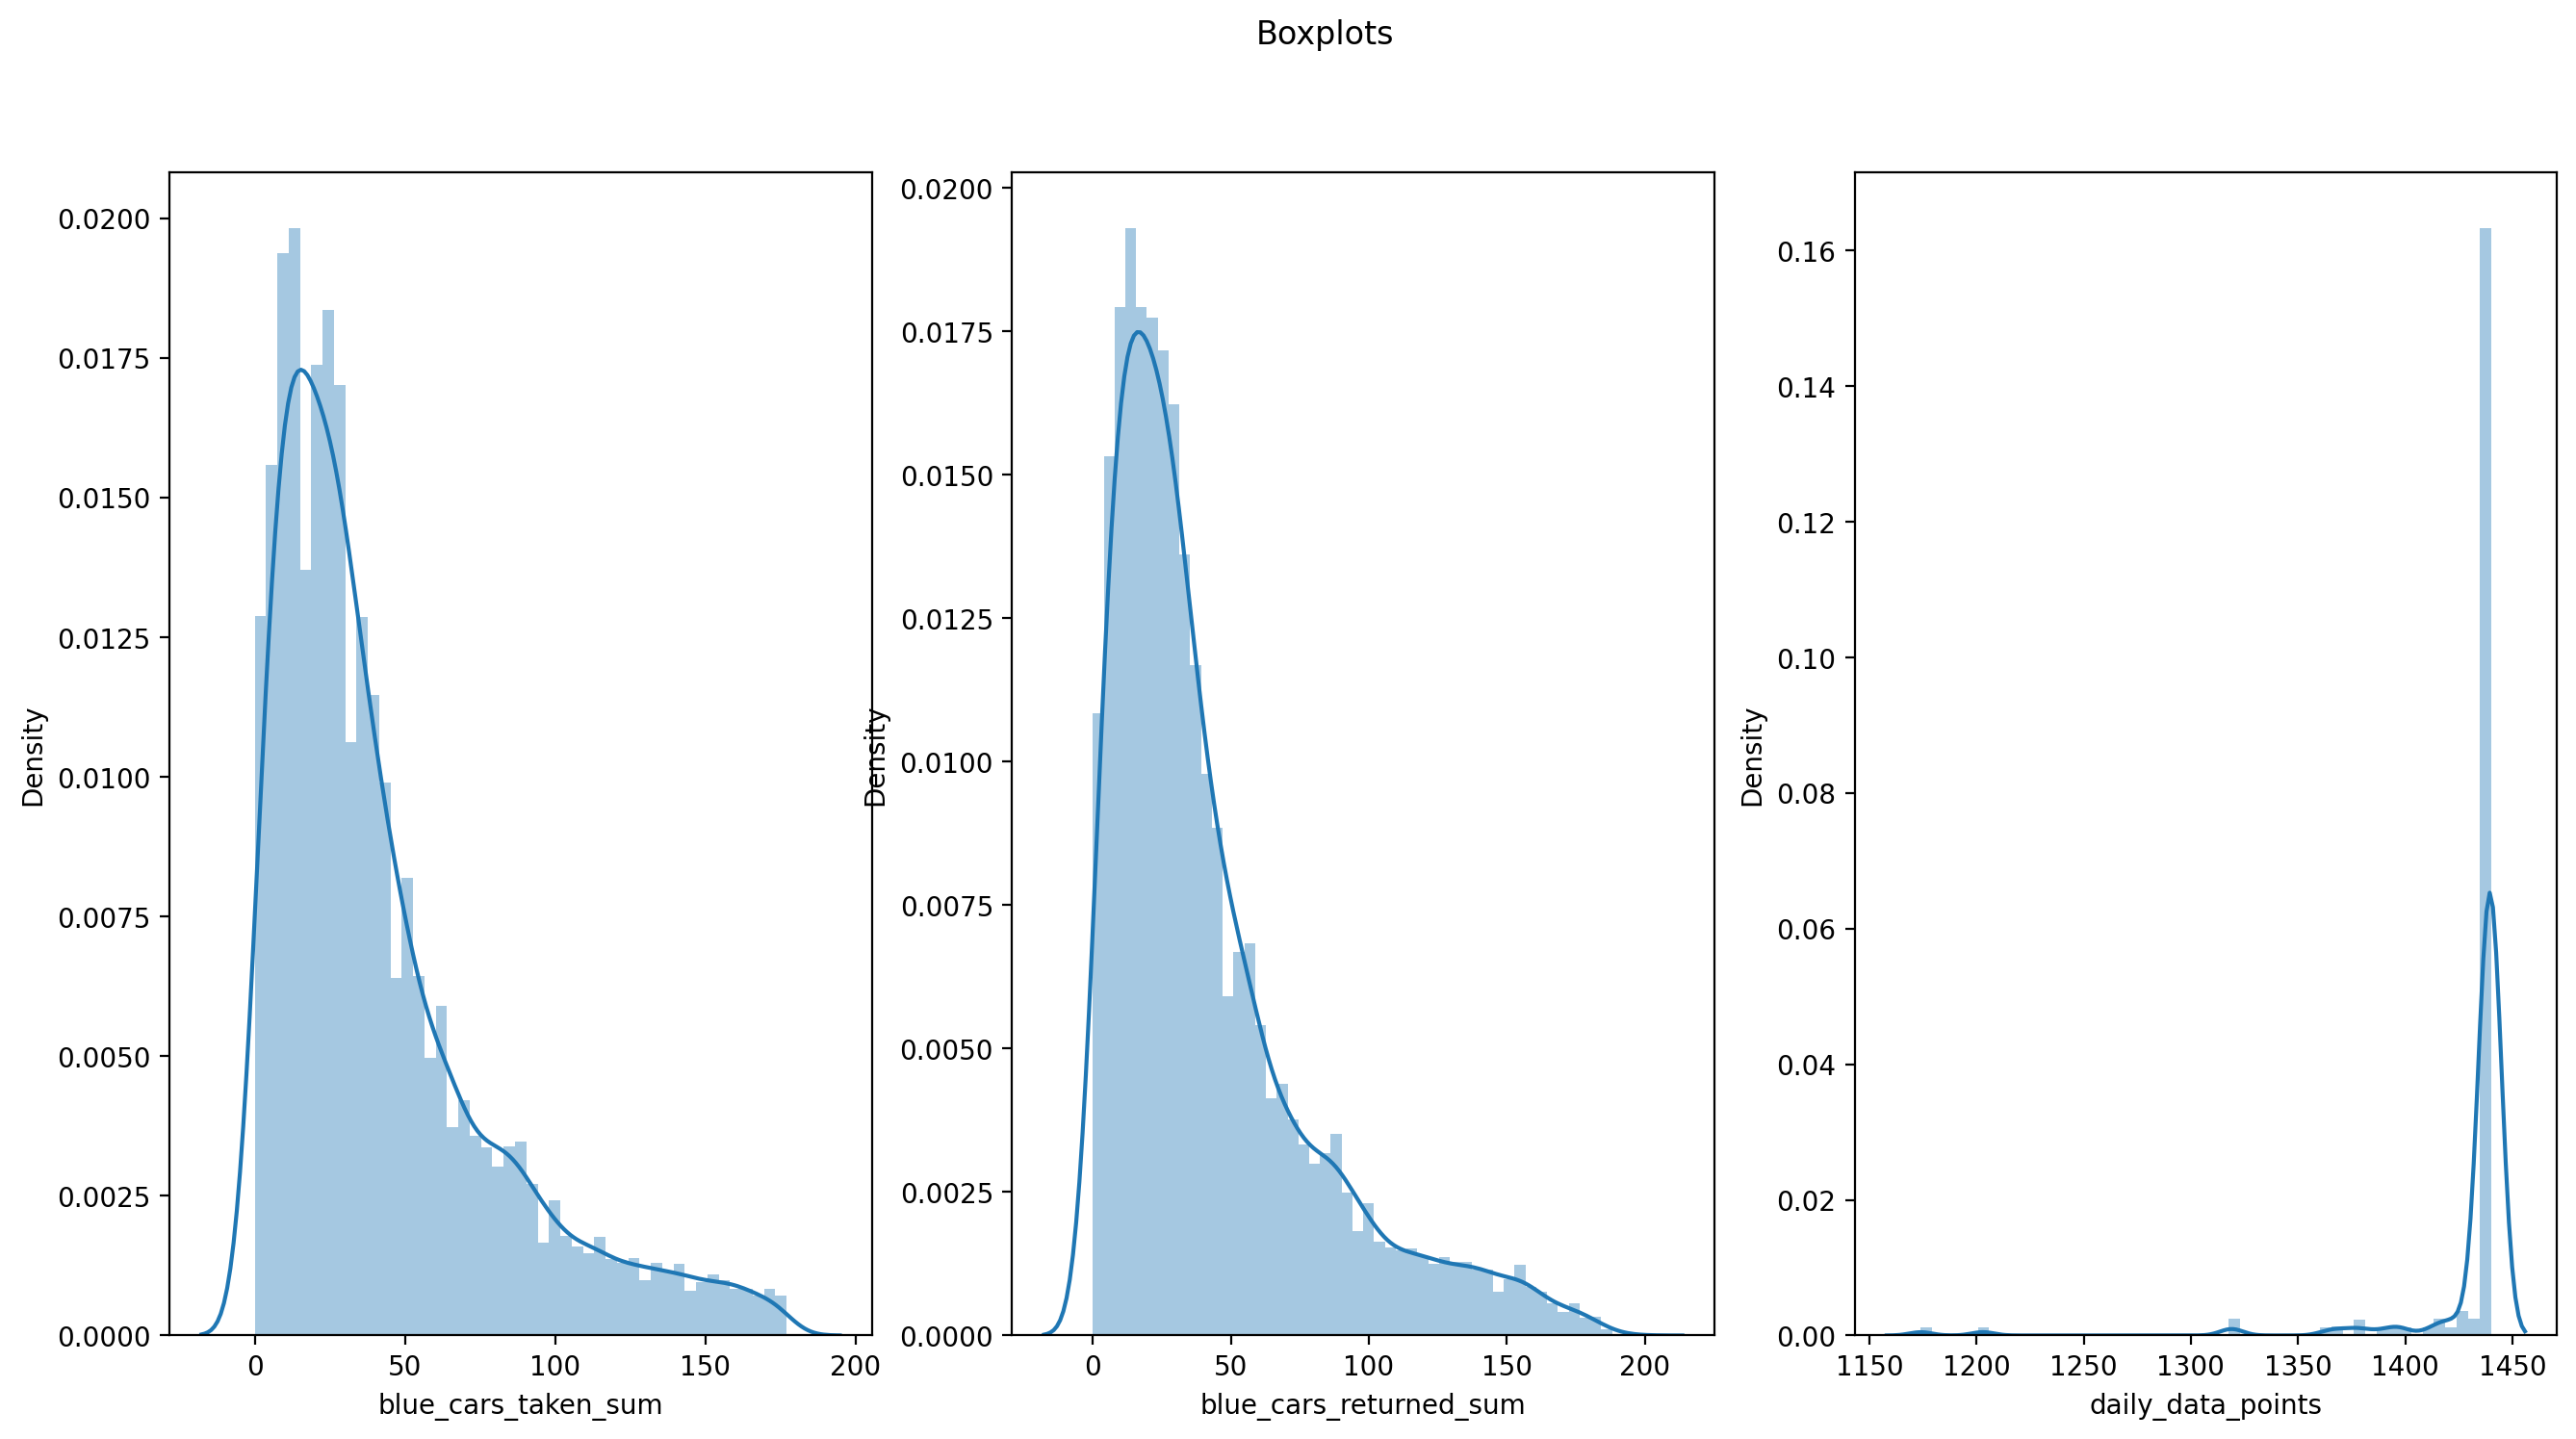

In [ ]:
# plotting boxplot for numerical columns in the data set
fig, ((ax1, ax2,ax3)) = plt.subplots(1,3,figsize=(16,8),dpi=200)
fig.suptitle('Boxplots')
sns.distplot(df['blue_cars_taken_sum'], ax=ax1)
sns.distplot(df['blue_cars_returned_sum'], ax=ax2)
sns.distplot(df['daily_data_points'], ax=ax3)
plt.show()

### Bivariate

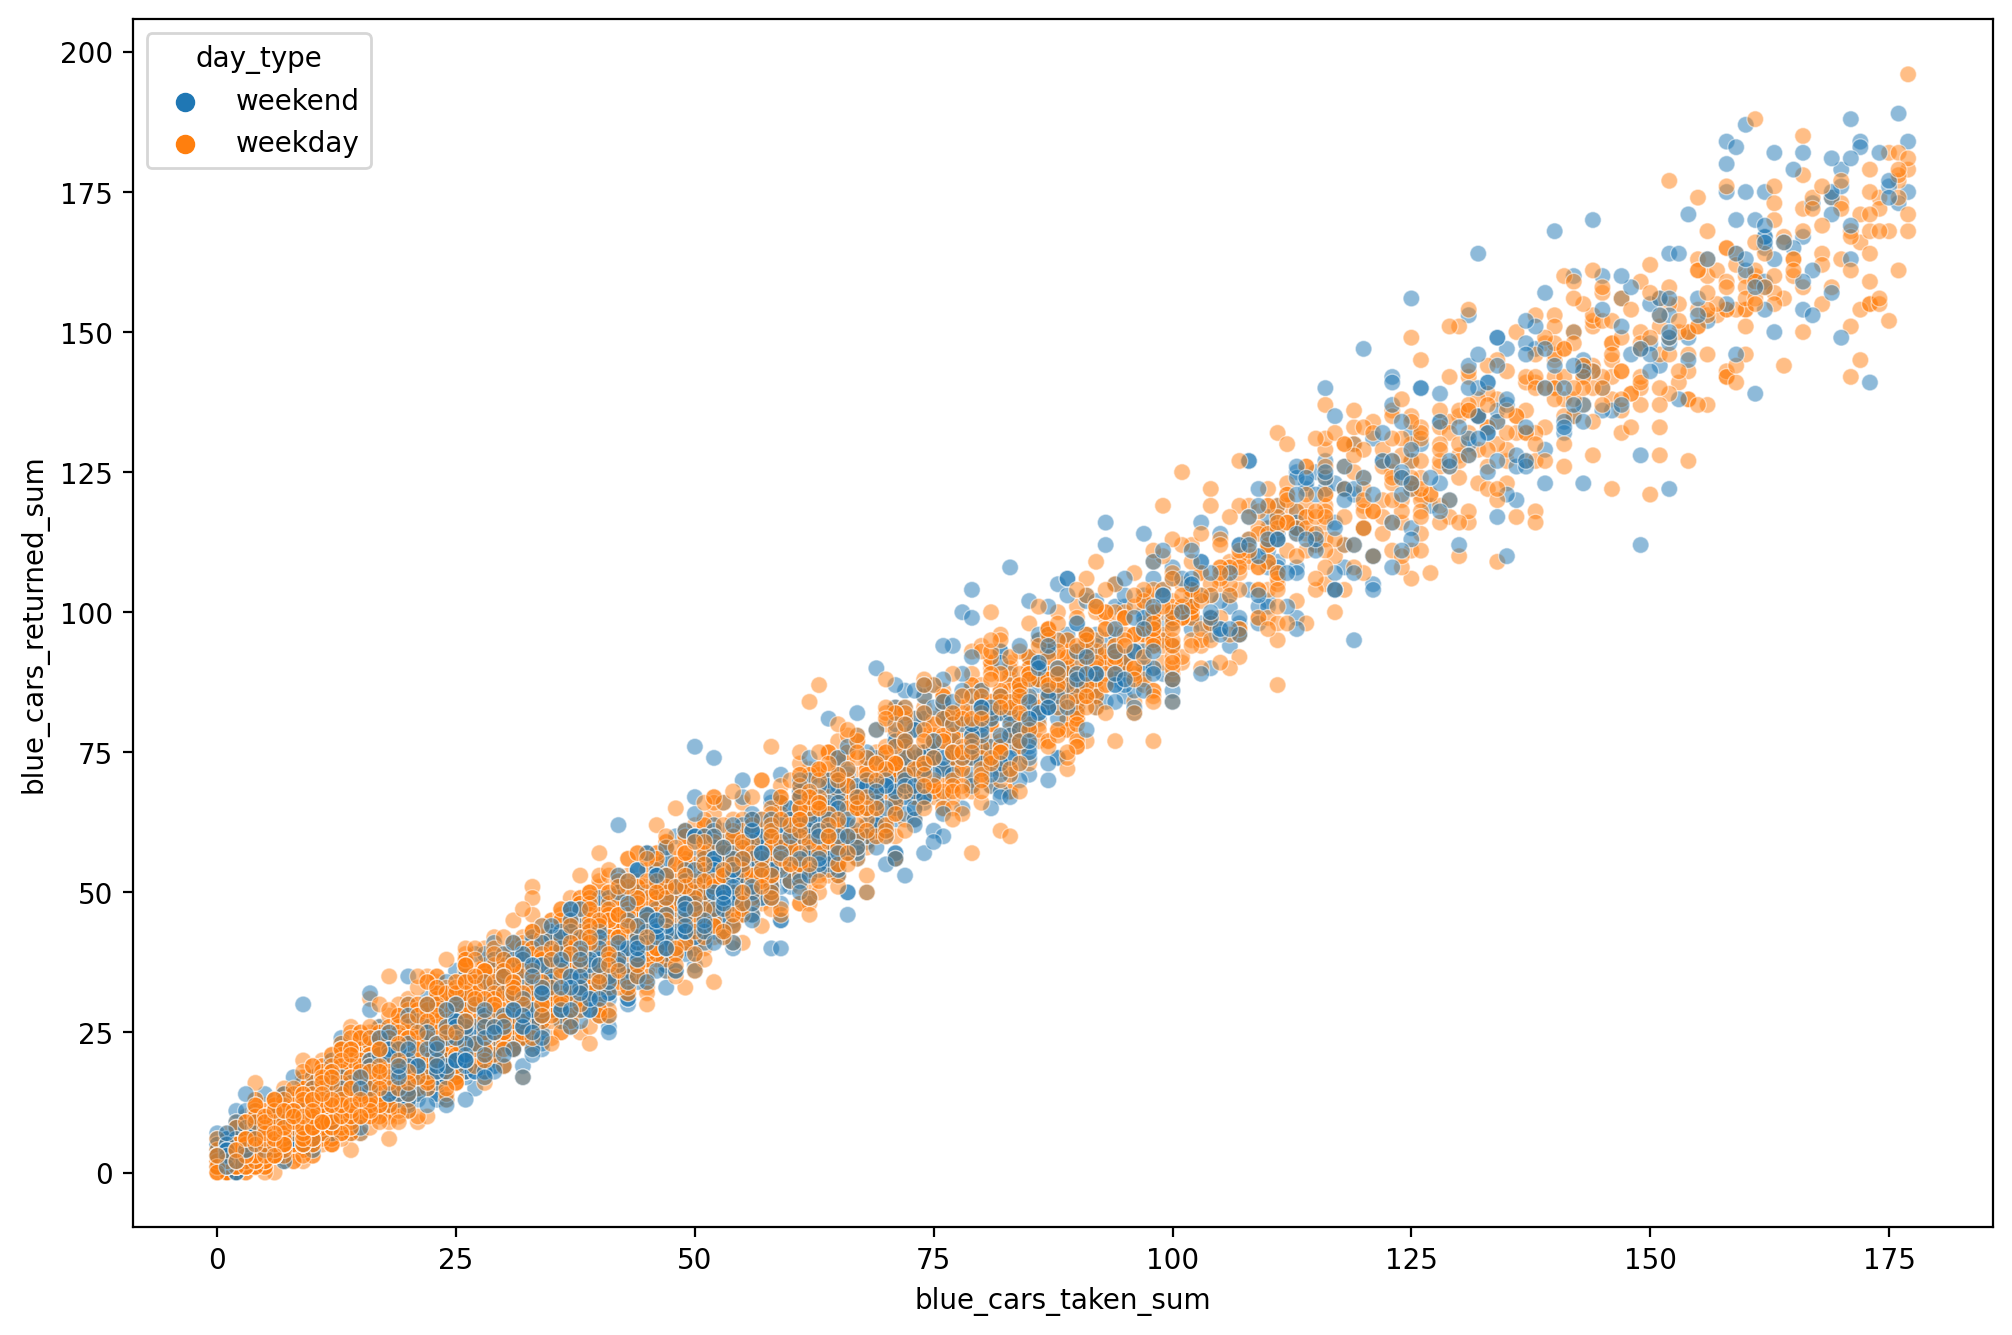

In [ ]:
# scatter plot of blue car taken vs blue car returned
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot( x=df.blue_cars_taken_sum,y=df.blue_cars_returned_sum,hue=df.day_type,alpha=0.5)
plt.show()

In [ ]:
#pearson_coeffient of the blue car taken vs blue car returned
pearson_coeff = df["blue_cars_taken_sum"].corr(df["blue_cars_returned_sum"], method="pearson") 
pearson_coeff

0.9891992466655329

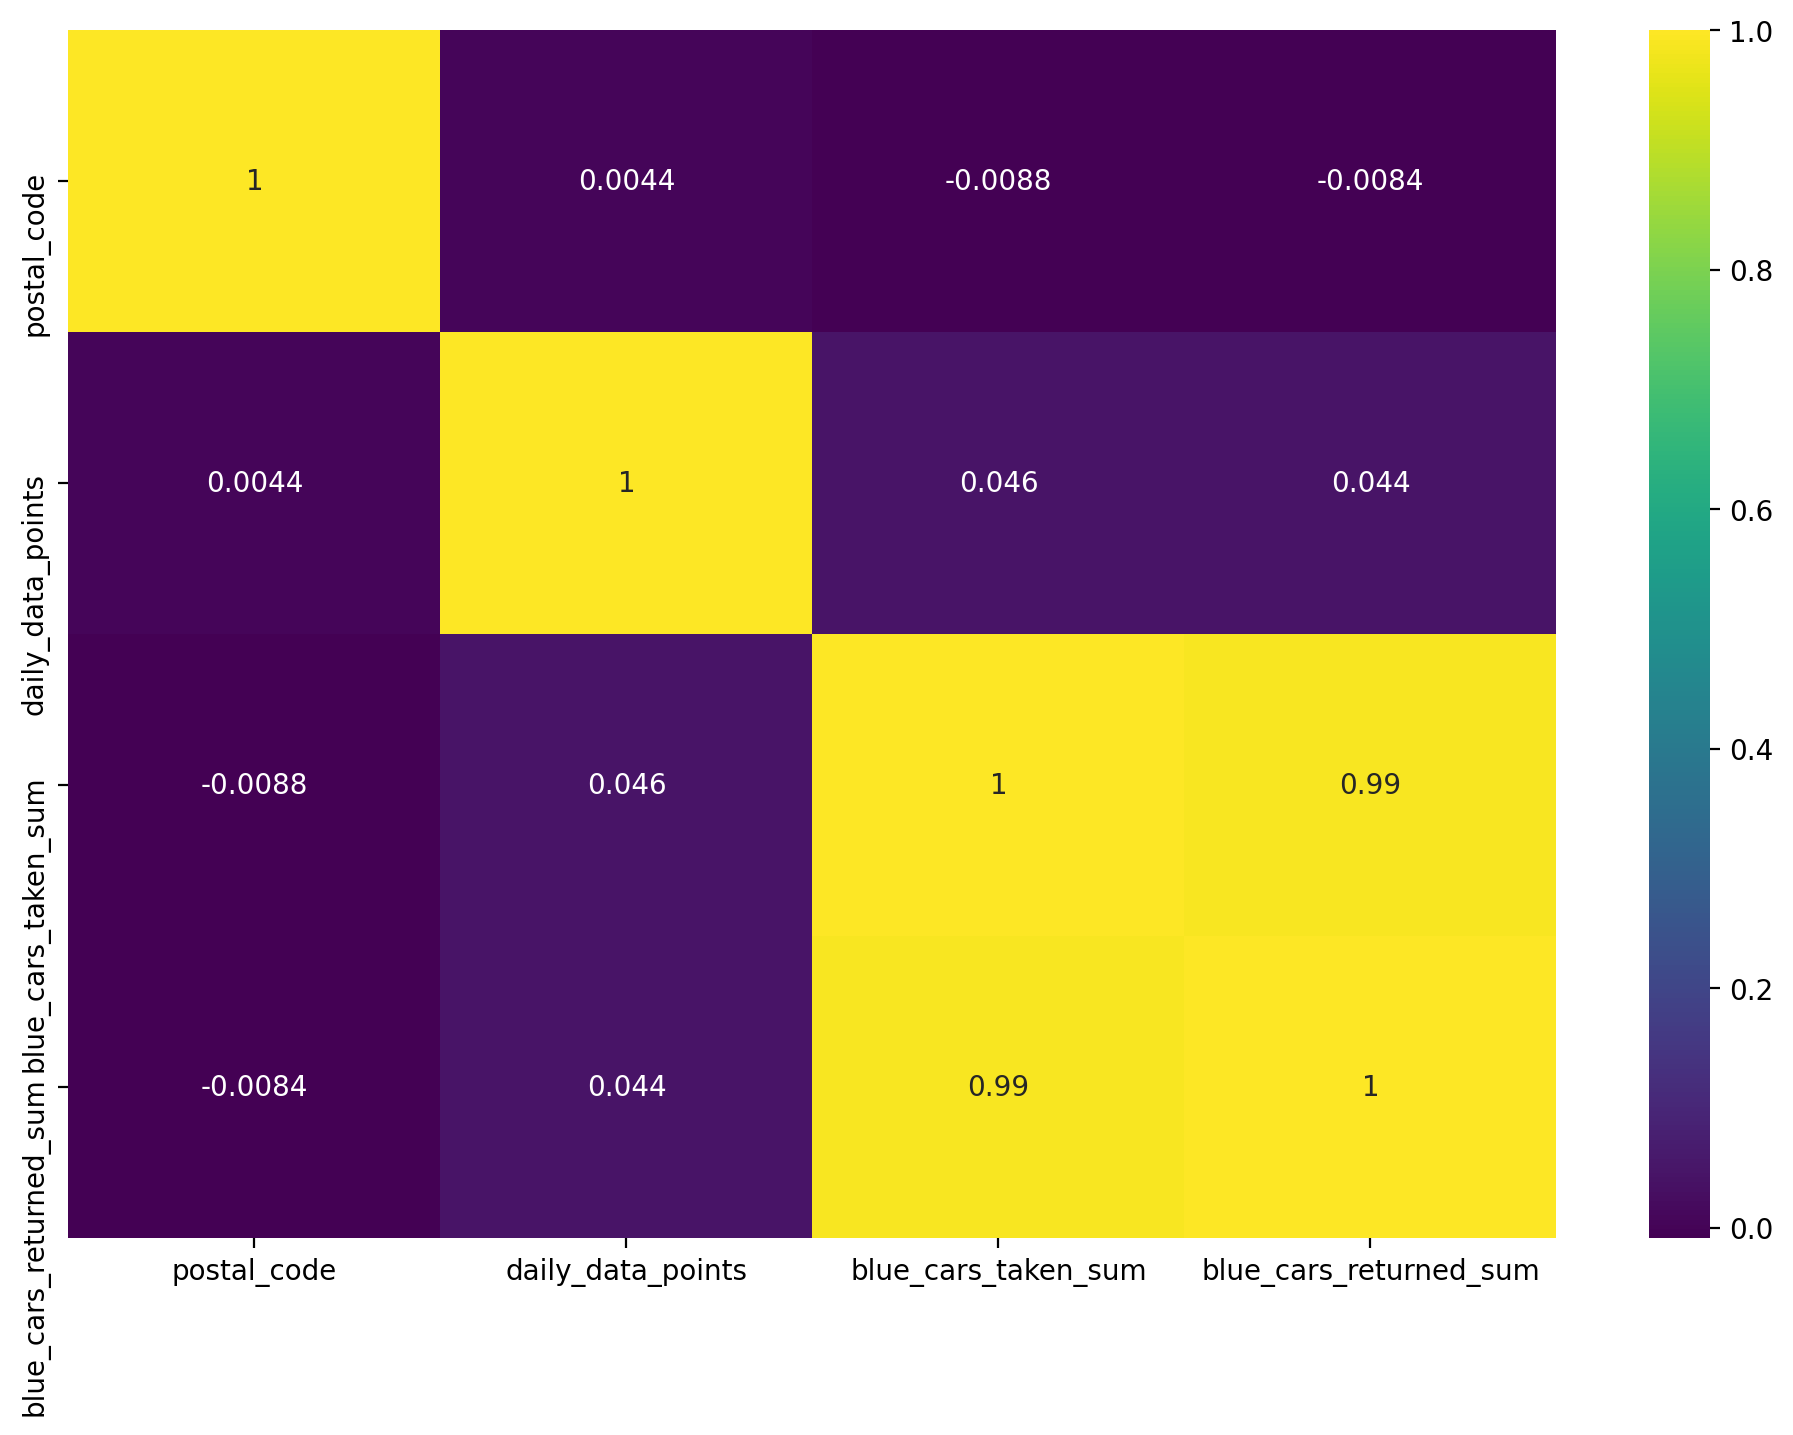

In [ ]:
# plotting heatmap to see the correlation
plt.figure(figsize=(12,8),dpi=200)
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.show()

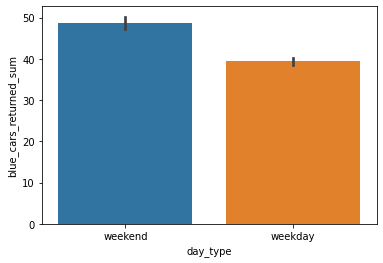

In [ ]:
# plotting to barplot to see when blue cars were returned
sns.barplot(y=df['blue_cars_returned_sum'],x=df['day_type'])
plt.show()

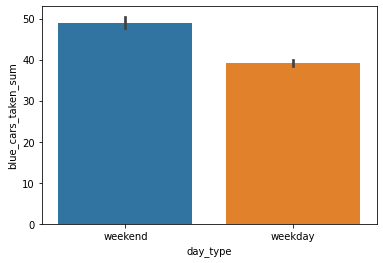

In [ ]:
# plotting to barplot to see when blue cars were taken
sns.barplot(y=df['blue_cars_taken_sum'],x=df['day_type'])
plt.show()

## Hypothesis testing

Null hypothesis: there is no difference in the average number of blue cars returned on saturday and that of the blue cars returned on sunday?

Alternative hypothesis: there is a difference in the average number of blue cars returned on saturday to that of the blue cars returned on sunday(CLAIM:)

In [ ]:
 # checking details for blue cars returned and day of week
df[['day_of_week','blue_cars_returned_sum']].head()

,day_of_week,blue_cars_returned_sum
54,Sat,9
155,Tue,7
210,Sat,12
3121,Tue,7
3127,Mon,3


In [ ]:
# frequency table for day of week
df['day_of_week'].value_counts()

Mon     1480
Tue     1462
Thur    1419
Fri     1416
Wed     1413
Sun     1384
Sat     1379
Name: day_of_week, dtype: int64

In [ ]:
# Calculating the mean difference of blue cars returned on saturday and sunday with random sampling
dull = np.random.choice(df.day_of_week, size = len(df),replace=False)
sat = df.blue_cars_returned_sum[dull == "Sat"]
sun = df.blue_cars_returned_sum[dull== "Sun"]
mean_diff = np.mean(sat) - np.mean(sun)
print(mean_diff)


-0.34010728642267907


In [ ]:
# calculating observed mean
sat1 = df.blue_cars_returned_sum[df.day_of_week=="Sat"]
sun1 = df.blue_cars_returned_sum[df.day_of_week=="Sun"]
observed_mean = np.mean(sat1) - np.mean(sun1)
print(observed_mean)

-2.242288853864949


In [ ]:
# Calculating p value
from scipy.stats import ttest_ind
tstat,pval = ttest_ind(sat1 ,sun1)
print(pval)

0.14013281405963982


In [ ]:
#interpretation of the p value
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we  reject the null  hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


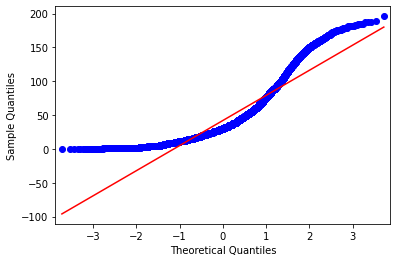

In [ ]:
# plotting qqplot to check if our data set is normal
from statsmodels.graphics.gofplots import qqplot
qqplot(df['blue_cars_returned_sum'],line='s')
plt.show()


## Conclusion
We fail to reject the null hypothesis and conclude that there was no sufficient evidence to suggest that there is a difference in the average number of blue cars returned on saturday to that of the blue cars returned on sunday(CLAIM:)